# Premier League Club Investment Analysis for an Investment Company (EDA)

**Domain: Sports**

**Context:**

A renowed investment firm usually invests in top-tier sports team that have potential.The data set in their possesion comprises crucial information about all the clubs that have participated in the premier league(assume it has data for all the clubs).It has data on the number of goals scored, the number of times they have finished in the top two positions and all other relavant details.

**Data:** Premier League Final Data.csv-: The data set contains informations about all the clubs so far participated in all premier league tournaments.(Data upto 2022)

**Data Dictionary:**

* Club: Name of the Football club
* Matches:The number of matches club has played in the premier league.
* Wins: Number of matches won by the club in the premier League.
* Loss: Number of matches won by the club in the premier League.
* Draws: Number of mathces that was a draw by the club in the Premier League.
* Clean Sheets: Number of mathces the club has prevented the opposing team from scoring.
* Team Launch: Year in which the club was founded.
* Winners: Number of times the club has won the premier League.
* Runners-Up: Number of times the club has finished up as runners-up in the premier League.
* Lastplayed_pl: Year in which the team last played in the premier League.

**Project Objective**

The management of the firm aims to invest in one of the top performing clubs in the English-Premier League.To aid in their decision making process,the analytics department has been tasked with creating a comprehensive report on the performance of various clubs.However,some of the more established clubs have already been acquired by competitors.As a result, the firm wishes to identify the clubs they can approach and potentially invest to ensure a successful and profitable deal.

**Key learning from the project:**

* Data cleaning is the process of identifying and correcting or removing errors,inconsistensies and inaccuracies in a dataset.
* Observation writing involves examining the data and noting any notable findings,anomalies or areas of interst.
* Exploratory Data Analysis is the process of examining and visualising a dataset to understand its main charecterstics,such as the distribution of data, the relationship between the variables and anomalies or any patterns that may exist.The goal of EDA is to uncover insights and trends that can help inform further analysis or decision making. It is often the first step in any data analysis project,as it provides a foundation for more advanced statistical methods and models.
* Treat null values based on domain knowledge aka domain specific imputation.



In [1]:
#Import libraries for Data Cleaninng and Data Analysis

import numpy as np
import pandas as pd

In [60]:
#Reading the dataset

df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Education\Project\Premier-League-Club-Investment-Analysis-main\Premier_League.csv")

## Section A: Exploring the DataSet

In [3]:
#Getting a snapshot of the data- The first 5 rows

df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,1Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,2Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


Upon examining the dataset,we note that it consist of 11 columns,with the first coloumn containing the club name and the remaining 10 columns providing information on the clubs performance in the premier league. However the data is not entirely clean, the club column has numerical values attached to it indicating serial numbers and there are Null values in the Runners-up column.


Lets further analyse the dataset:


In [4]:
#Getting a snapshot of the dataset- The last 5 rows

df.tail()



,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
35,36West Bromwich Albion,494,117,238,139,510,107,1878,NaN,0,Apr-18
36,37West Ham United,1025,343,423,259,1262,266,1895,NaN,0,Apr-23
37,38Wigan Athletic,304,85,143,76,316,73,1932,NaN,0,Apr-13
38,39Wolverhampton Wanderers,334,98,151,85,353,75,1877,0.0,0,Apr-23
39,40Portsmouth,266,79,122,65,292,61,April 1898,NaN,NaN,Apr-10


In [5]:
# Displaying the size of the data

df.shape

(40, 11)

We have 40 rows and 11 columns in the dataframe

In [6]:
# Getting more informations about the datatypes and null values in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         25 non-null     float64
 9   Runners-up      22 non-null     object 
 10  lastplayed_pl   40 non-null     object 
dtypes: float64(1), int64(6), object(4)
memory usage: 3.6+ KB


There are 40 non-null values in each columns. However the 'winners' and 'Runner-up' columns has null values as we have observed earlier.

we also notice that the 'Runners-up' columns is of object datatype(non-numeric). To perform any numerical analysis on this column we would have to convert it into integer data type.



# Section B: Cleaning the dataset

In [7]:
# Lets start with the 'Club' column

df['Club'] = df['Club'].str.replace('\d+','')


# In this code '\d+' is a regular expression pattern that matches one or more digits.
# The str.replace() method replaces this pattern with an empty string.
# This code effectively removes the numbers at the start of each club name in the 'club' column.

C:\Users\HP\AppData\Local\Temp\ipykernel_3496\3554134196.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Club'] = df['Club'].str.replace('\d+','')


In [8]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


Now that the numbers have been removed from the front of each club name in the 'Club' column, it has been cleaned and is ready for further analysis.

In [9]:
# Now lets look up the Winners column. Lets check if there are any null values in the column

df['Winners'].isnull().any()



# In this code, the isnull() method is called on the 'Winners' column of the Data Frame.
# Isnull() returns a boolean series where each element indiacates wheather the corresponding value in the column is Null(True) or not(False)
# The any() method is used to check if there is atleast one true value in the column, indicating the presence of Null value



True

In [10]:
df['Winners'].value_counts()

# This code returns the unique values in the column and the number of times each value occurs.

0.0     18
1.0      3
3.0      1
5.0      1
6.0      1
13.0     1
Name: Winners, dtype: int64

Upon inspecting the data set, we have got to know that there are 25 non-null values. Furthermore it is noteworthy that 18   clubs have never won the Premier league title as winners column counts 0 for each clubs.


We know that The English premier League started in the year 1992 and we data upto 2022, and a premier League championshipship happens once a year, so we know that there are a total of 30 Premier League Championships(2022-1992=30).

Looking at the counts its evident that out of the 25 clubs(Non-null non zero values) 1 club has won the title 13 times,1 club has won the title 6 times,1 club has won 5 times,1 club has won 3 times,3 clubs have won once, which sums up to 30.

This implies that all other clubs in the dataset has not won any premier league Titles. So it would be appropriate to update the 'winners' column by replacing the null values with 0, as these clubs have not won any titles. This data cleaning step would ensure that the dataset accurately reflects the historical performance of each club in terms of premier league wins.

In [11]:
# Replacing the null values with zero.

df['Winners'].fillna(0,inplace=True)

# fillna.(0,inplace=True) This is a method in pandas which is used to fill null values in a series or a dataframe.
# In this case, it is used to fill the winners column with 0 in places of null values

In [12]:
#Checking for any null values after the data cleaning.

df["Winners"].isnull().any()

False

In [13]:
# Now we'll look at the 'Runners-up' column, as seen earlier this too had null values

df["Runners-up"].value_counts()



0    10
1     3
-     3
6     1
4     1
5     1
3     1
7     1
2     1
Name: Runners-up, dtype: int64

Teams have different number of runner-up wins. Upon inspecting the data, we can see that 1 team has won the runner up title 7 times, another 6 times, one team 5 times,another one 4 times, another 3 times, one team 2 times and the 3 teams have finished up as runnerup 3 times.

We also notice some inconsistencies in the data, this column has null values and '-' we need to clean


In [14]:
# No of runners-ups
1+1+1+6+4+5+3+7+2

30

Since we know that there are 30 total Premier Leagues held and we have the data for all,so we will replace null values with 0 and "-" with zero

In [15]:
#Replacing null values with zero

df["Runners-up"].fillna(0,inplace=True)
df["Runners-up"].replace('-',0,inplace=True)

# replace() method is used to replace the "-" values with zero. The inplace=True argument is used to modify the original dataframe.

In [16]:
# Also we have seen it earlier that 'Runners-up' column is "Object" type let us convert it into int type

df["Runners-up"] = pd.to_numeric(df["Runners-up"],errors='coerce')

df["Runners-up"] = df["Runners-up"].astype("int64")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         40 non-null     float64
 9   Runners-up      40 non-null     int64  
 10  lastplayed_pl   40 non-null     object 
dtypes: float64(1), int64(7), object(3)
memory usage: 3.6+ KB


This code is converting "Runners-up" column in pandas Dataframe, df, from 'object' data type to 'int64' datatype

The first line of code uses pd.to_numeric() function which attempts to convert "Runners-up" column to an numeric data type. The errors='coerce' argument tells the function to replace any errors with null values.

The second line of code astype.()method to convert the "Runners-up" column to an "Int64" data type. The .astype() method is called on the "Runners-up" column of the DataFrame, and the argument "Int64" specifies the desired data type.

In [18]:
#No new null values found in "Runners-up" column

df["Runners-up"].isnull().any()

False

In [19]:
#Checking Data Type
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         40 non-null     float64
 9   Runners-up      40 non-null     int64  
 10  lastplayed_pl   40 non-null     object 
dtypes: float64(1), int64(7), object(3)
memory usage: 3.6+ KB


We have successfully converted 'Runners-up' column into int data type

In [20]:
# We have 'TeamLaunch' column that has inconsistencies.

df['TeamLaunch'].value_counts()

1878           3
1886           2
1905           2
1874           2
1892           2
1879           2
1884           2
1882           2
1875           2
1895           1
1881           1
1904           1
1932           1
1912           1
1863           1
1877           1
1885           1
1867           1
1889           1
1894           1
1865           1
1902           1
1876           1
1919           1
16 Oct 1878    1
1861           1
Aug 1883       1
1901           1
1899           1
April 1898     1
Name: TeamLaunch, dtype: int64

In [21]:
#We need to convert 'TeamLaunch' into 'YYYY'

# First we need to convert the column into 'DateTime' format

df['TeamLaunch'] = pd.to_datetime(df["TeamLaunch"],errors="coerce")

# Converting the column to 'YYYY' format

df['TeamLaunch']=df['TeamLaunch'].dt.strftime('%Y')

The first line of code converts the "TeamLaunch" column to DateTime format using pandas 'pd.to_datetime()' function. The errors parameter is set to "coerce", which means that any invalid dates will be set to NaT (Not a Time) in the resulting datetime column.

The second line of code uses 'dt.strftime('%Y')' method to convert datetime column to a string with only Year values. '%Y' is the code for Year. This line of code will create a new column 'column_name' in the format YYYY.

In [22]:
df["TeamLaunch"].value_counts()

1878    4
1886    2
1905    2
1874    2
1892    2
1879    2
1884    2
1882    2
1875    2
1895    1
1881    1
1889    1
1932    1
1912    1
1877    1
1863    1
1885    1
1867    1
1894    1
1904    1
1865    1
1902    1
1876    1
1919    1
1861    1
1883    1
1901    1
1899    1
1898    1
Name: TeamLaunch, dtype: int64

In [23]:
#Let us explore the 'lastPlayed' column 

df['lastplayed_pl'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 40 entries, 0 to 39
Series name: lastplayed_pl
Non-Null Count  Dtype 
--------------  ----- 
40 non-null     object
dtypes: object(1)
memory usage: 448.0+ bytes


In [24]:
# extracting only the year in lastplayed_pl column
    
df['lastplayed_pl'] = pd.to_datetime(df['lastplayed_pl'], format='%b-%y',errors='coerce')

df['lastplayed_pl'] = df['lastplayed_pl'].dt.strftime('%Y')

# The first line of code uses 'pd.to_datetime' converts the column 'lastplayed_pl' to datetime format,

# the arguments format=%b-%Y' is indiacting the input is a hree-letter month abbreviation followed by a two-digit year (e.g. "Mar-21"). 



In [25]:
df["lastplayed_pl"].value_counts()

2023    19
2022     3
2017     3
2018     3
2012     2
2011     1
2007     1
2001     1
2008     1
2002     1
2015     1
2021     1
2000     1
2013     1
2010     1
Name: lastplayed_pl, dtype: int64

The column has been converted to 'YYYY' format


## Section C: Deep Dive into Data Analysis

In [26]:
# Calculating the basic data summaries

df.describe()

,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,Winners,Runners-up
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,573.750000,215.450000,210.425000,147.875000,769.000000,167.925000,0.750000,0.750000
std,358.986519,194.164608,102.132364,88.873632,627.746478,135.561584,2.372384,1.750458
min,190.000000,41.000000,85.000000,48.000000,181.000000,45.000000,0.000000,0.000000
25%,275.000000,80.500000,127.500000,71.500000,304.500000,66.000000,0.000000,0.000000
50%,443.000000,116.500000,193.500000,120.000000,462.000000,104.000000,0.000000,0.000000
75%,934.750000,295.750000,263.000000,222.000000,1142.750000,244.250000,0.000000,0.000000
max,1182.000000,720.000000,429.000000,329.000000,2229.000000,491.000000,13.000000,7.000000


The average number of matches played by each team is 573.75 and the mean number of goals scored is 769. However the median number of goals scored is 462, indicating that some teams have scored goals significantly higher than other teams.

Interstingly the mean number of Winners and Runners-up is 0, suggesting that most teams have not won or been runnerups in the tournaments.

The max value of Winners and Runnersup is 13 and 7 respectively, indicating that one team has won the tounament 13 times and one team has been the runner up 7 times

In [27]:
# Team that has won df

df[df["Winners"]==13]['Club']

20    Manchester United
Name: Club, dtype: object

In [28]:
# Team that has won runner-up 7 times

df[df["Runners-up"]==7]['Club']

20    Manchester United
Name: Club, dtype: object

The data shows that 'Manchester United' has won the Title 13 times and has won the runner-up 7 times

In [29]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Histogram of matches played')

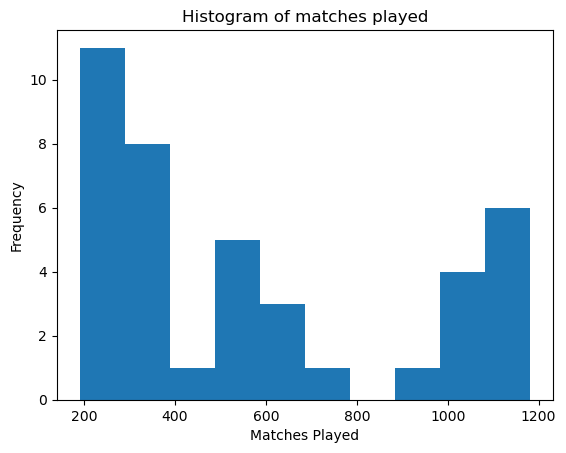

In [30]:
# Let us visualise each column 

#Begin with the Matches played column

#Plotting a histogram

plt.hist(df['Matches Played'])

plt.xlabel("Matches Played")
plt.ylabel("Frequency")
plt.title("Histogram of matches played")

On examining the histogram, its evident that the mojority of teams has played less than 400 matches, there are a few teams that have played expectionally a high number number of matches,exceeding 900.

As per the project requirements, it is worth noting that some of the more established clubs have already been owned by the competitors. Therefore, the client is interested in identifying potential clubs that may perform well in the future, even if they have less experience in the Premier League.

In [31]:
# Identify clubs which has played more than 900 mathces

df[df["Matches Played"]>=900]['Club']

0               Arsenal
1           Aston Villa
9               Chelsea
13              Everton
18            Liverpool
19      Manchester City
20    Manchester United
22     Newcastle United
29          Southampton
33    Tottenham Hotspur
36      West Ham United
Name: Club, dtype: object

Upon analysis we have observed that there are a total of 11 clubs who have significantly more experience in the premier League as compared to others. These clubs have played a high number of mathces and have established themselves as experienced players in the League.

As per the client's requirements, we are intersted in identifying potential clubs that may perform well in the future,even if they less experience in the premier league.Therefore we have decided to drop these 11 clubs from our analysis, as their establised presence in the league may skew our results and make it difficult to identify less experienced clubs with high potential.

By removing these clubs, we can focus our analysis on the remaining clubs and potentially identify hidden gems that may have been overlooked due to their lack of experience in the league.

In [32]:
df[df["Matches Played"]<900]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023
7,Burnley,304,83,145,76,300,78,1882,0.0,0,2022
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,2007
10,Coventry City,354,99,143,112,387,92,1883,0.0,0,2001
11,Crystal Palace,532,153,241,138,576,133,1861,0.0,0,2023
12,Derby County,266,68,128,70,271,66,1884,0.0,0,2008


In [33]:
df = df[df["Matches Played"] < 900].reset_index(drop=True)

# This line of code stores values whose has matches played less than 900 and resets the index

In [34]:
#View data

df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023


In [35]:
df.shape

(29, 11)

In [36]:
#lets dig deep into the win, loss,drawn and clean sheets column

It is essential to understand that the values in all the columns represent the cumulative scores over all the matches played.

To accurately analyze the performance of the teams, we must normalize the data by dividing the no. of wins, loss, drawn, clean sheet, goals by the number of matches played.

This normalization will provide us with a fair idea of the winning, losing, draw, and clean sheet percentages of each team along with goals per match.

In [37]:
# Creating new columns for win rate,loss rate, draw rate, and clean sheet rate

df['Win rate'] = (df['Win'] / df['Matches Played'])*100

df['Loss rate'] = (df["Loss"] / df['Matches Played'])*100

df['Drawn Rate'] = (df['Drawn'] / df['Matches Played'])*100

df['Clean sheet rate'] = (df['Clean Sheets'] / df['Matches Played'])*100


In [38]:
#creating column for average goals scored in a match

df["Avg Goals per match"]= df["Goals"] / df['Matches Played']

df["Avg Goals per match"]= df["Avg Goals per match"].round()

In [39]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Win rate,Loss rate,Drawn Rate,Clean sheet rate,Avg Goals per match
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


Text(0.5, 1.0, 'Distribution of Winning Rate, Drawn Rate, Loss Rate and Clean Sheet Rate')

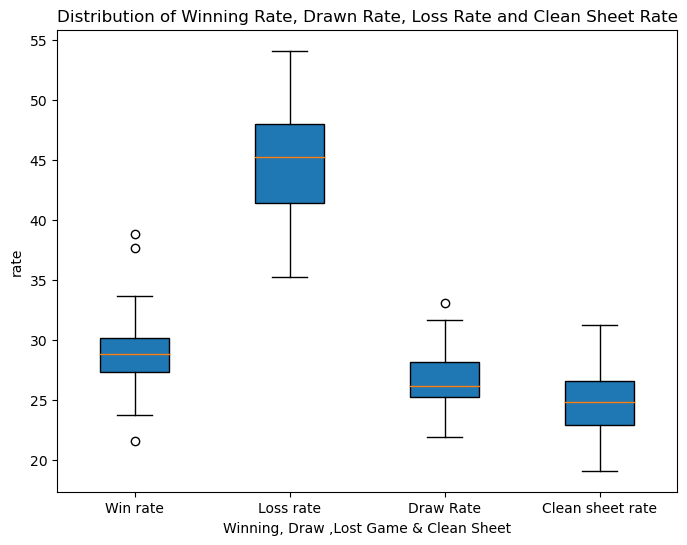

In [40]:
# Visualising win rate,loss rate,drawn rate and cleansheet rate

#Setting figure size
plt.figure(figsize=(8,6))

#Plotting the box plot
boxplot=plt.boxplot([df['Win rate'],df['Loss rate'],df['Drawn Rate'] ,df['Clean sheet rate']],patch_artist=True,labels=['Win rate','Loss rate','Draw Rate','Clean sheet rate'])

plt.xlabel("Winning, Draw ,Lost Game & Clean Sheet")
plt.ylabel("rate")
plt.title("Distribution of Winning Rate, Drawn Rate, Loss Rate and Clean Sheet Rate")

#### Winning Rate
Its evident that there are a couple of outliers above the upper whisker,indicating exceptionally good winning rates, we will further analyse them.

we will also see the club that has exceptionally low win rate

#### Loss Rate
We can see that the loss rates for these clubs are high compared to their win rate

#### Draw Rate
We observe an outlier in draw rate, which indicates a particluar club has exceptionally high draw rate. This alone might not indicate a positive sign, as it may also suggest that the club is struggling to grab a win in their matches. we'll identify this club in further anlysis

#### Clean sheet Rate
The data is pretty symmetric

In [41]:
#Identifying the clubs with high winning rate
#calculating the Inter Quartile Range for Winning Column

Q1= df["Win rate"].quantile(0.25)
Q3= df["Win rate"].quantile(0.75)

IQR= Q3-Q1

#Calculating the upper boundary for outliers

upper_bound=Q3 + 1.5 * IQR

#Identifying clubs above the upper_bound

high_win_rate= df[df['Win rate'] > upper_bound]

high_win_rate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Win rate,Loss rate,Drawn Rate,Clean sheet rate,Avg Goals per match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
12,Leeds United,574,223,202,149,784,179,1919,0.0,0,2023,38.850174,35.191638,25.958188,31.184669,1.0


Two teams Blackburn Rovers and Leeds United	 has exceptionally high winning rate of 37% and 38%  respectively.

In [42]:
# Now lets anlayse the team with the low winning rate

#Calculating the Lower boundary for outliers
lower_bound= Q1 - 1.5 * IQR

# Identifying clubs above the Lower_bound

Low_win_rate= df[df["Win rate"]<lower_bound]
Low_win_rate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Win rate,Loss rate,Drawn Rate,Clean sheet rate,Avg Goals per match
17,Hull City,190,41,101,48,181,58,1904,0.0,0,2017,21.578947,53.157895,25.263158,30.526316,1.0


Club is lowest winning rate of 22% is Hull City 

In [43]:
# Drawn Rate further analysis. Identify club with high drawn rate
# Calculate the interquartile range for the "Drawn Rate" column
Q1 = df['Drawn Rate'].quantile(0.25)
Q3 = df['Drawn Rate'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper boundaries for potential outliers <-- Expectional high winning rate compared to other teams
upper_bound = Q3 + 1.5 * IQR

# Identify the clubs with high winning rate 
high_draw_rate = df[(df['Drawn Rate'] > upper_bound)]
high_draw_rate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Win rate,Loss rate,Drawn Rate,Clean sheet rate,Avg Goals per match
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


Brighton & Hove Albion is expectionally high Drawn Rate of 33%

In [44]:
df['Avg Goals per match'].describe()

count    29.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Avg Goals per match, dtype: float64

There isnt much we could interpret from this, therefore will not be used for further analysis

In [45]:
# Lets take a look at winners column again
df["Winners"].value_counts()

0.0    27
1.0     2
Name: Winners, dtype: int64

In [46]:
#lets look at runners-up column too

df["Runners-up"].value_counts()

0    28
1     1
Name: Runners-up, dtype: int64

Here we can see that from a total of 29 clubs we have 2 clubs that have won the premier League once and one club has been the runner up once. Lets a take a look at the clubs

In [47]:
df[(df["Winners"]==1) | (df["Runners-up"]==1)]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Win rate,Loss rate,Drawn Rate,Clean sheet rate,Avg Goals per match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
13,Leicester City,642,216,262,164,860,167,1884,1.0,0,2023,33.644860,40.809969,25.545171,26.012461,1.0


Blackburn Rovers have won Premier League once and been an Runners-up once and Leicester City has won Premier League once.

In [48]:
# Now lets again look at the matches played column in our new dataframe(29 clubs)
df["Matches Played"].describe()

count     29.000000
mean     372.482759
std      153.533296
min      190.000000
25%      266.000000
50%      305.000000
75%      494.000000
max      696.000000
Name: Matches Played, dtype: float64

The average number of matches played is 372

In [49]:
#Lets have a look at the last_played column
df['lastplayed_pl'].value_counts()

2023    8
2022    3
2017    3
2018    3
2012    2
2011    1
2007    1
2001    1
2008    1
2002    1
2015    1
2021    1
2000    1
2013    1
2010    1
Name: lastplayed_pl, dtype: int64

Out of the total 29 teams, eight are currently playing in the Premier League. Since these teams are currently active in the league, it makes sense to prioritize them in our analysis. However, there are also teams that date back as early as 2000. It may be appropriate to assign these teams less weight.

In [50]:
#lets see which of the teams are currentls playing in 2023
df[df['lastplayed_pl']=='2023']["Club"]

3                 Bournemouth
4      Brighton & Hove Albion
8              Crystal Palace
10                     Fulham
12               Leeds United
13             Leicester City
16          Nottingham Forest
27    Wolverhampton Wanderers
Name: Club, dtype: object

Giving more priority to teams that have more recent experience playing in the Premier League is ideal. When making the final decision, we will assign higher weight to teams that have played more recently, and lesser weight to those that have not played recently.

## Section D: Final Recommendation Framework

Let's create a plan to Score each team on the pre defined metric.

* Give a score of 10 if club have a relatively high experience in the Premier League above average (372)
* Give a score of 15 if club has winning rate above Q3
* Give a score of 15 if club has lossing rate below Q1
* Give a score of 10 if club drawn rate below Q1 and losing rate is below Q1
* Give a score of 10 if club has clean sheet above Q3 and winning rate is above Q3
* Give a score of 15 if club has won premier league
* Give a score of 10 if club has been a runners-up in premier league
* Give a score of 15 if club has been currently playing in premier league

In [51]:
#calculating the upper band for winning rate 
upper_bound_WinningRate = df['Win rate'].quantile(0.75)

# Calculate the lower bound for the "Loss Rate" column
lower_bound_LosingRate = df['Loss rate'].quantile(0.25)

# Calculate the lower bound for the "Drawn Rate" column
lower_bound_DrawnRate = df['Drawn Rate'].quantile(0.25)

# Calculate the upper bound for the "Drawn Rate" column
upper_bound_CleanSheetRate = df['Clean sheet rate'].quantile(0.75)

In [52]:
len(df)

29

In [53]:
#Creating a column with zeros in it

df['scores']=np.zeros(len(df))

In [54]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Win rate,Loss rate,Drawn Rate,Clean sheet rate,Avg Goals per match,scores
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,0.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0,0.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0,0.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0,0.0


In [55]:
df.loc[df["Matches Played"]>372,"scores"]+=10
df.loc[df['Win rate'] >= upper_bound_WinningRate, 'scores'] += 15
df.loc[df['Loss rate'] <= lower_bound_LosingRate, 'scores'] += 15
df.loc[(df['Drawn Rate'] <= lower_bound_DrawnRate) & (df['Loss rate'] <= lower_bound_LosingRate), 'scores'] += 10
df.loc[(df['Clean sheet rate'] >= upper_bound_CleanSheetRate) & (df['Win rate'] >= upper_bound_WinningRate), 'scores'] += 10
df.loc[df['Winners'] == 1, 'scores'] += 15
df.loc[df['Runners-up'] == 1, 'scores'] += 10
df.loc[df['lastplayed_pl'] == 2023, 'scores'] += 15

(0.0, 100.0)

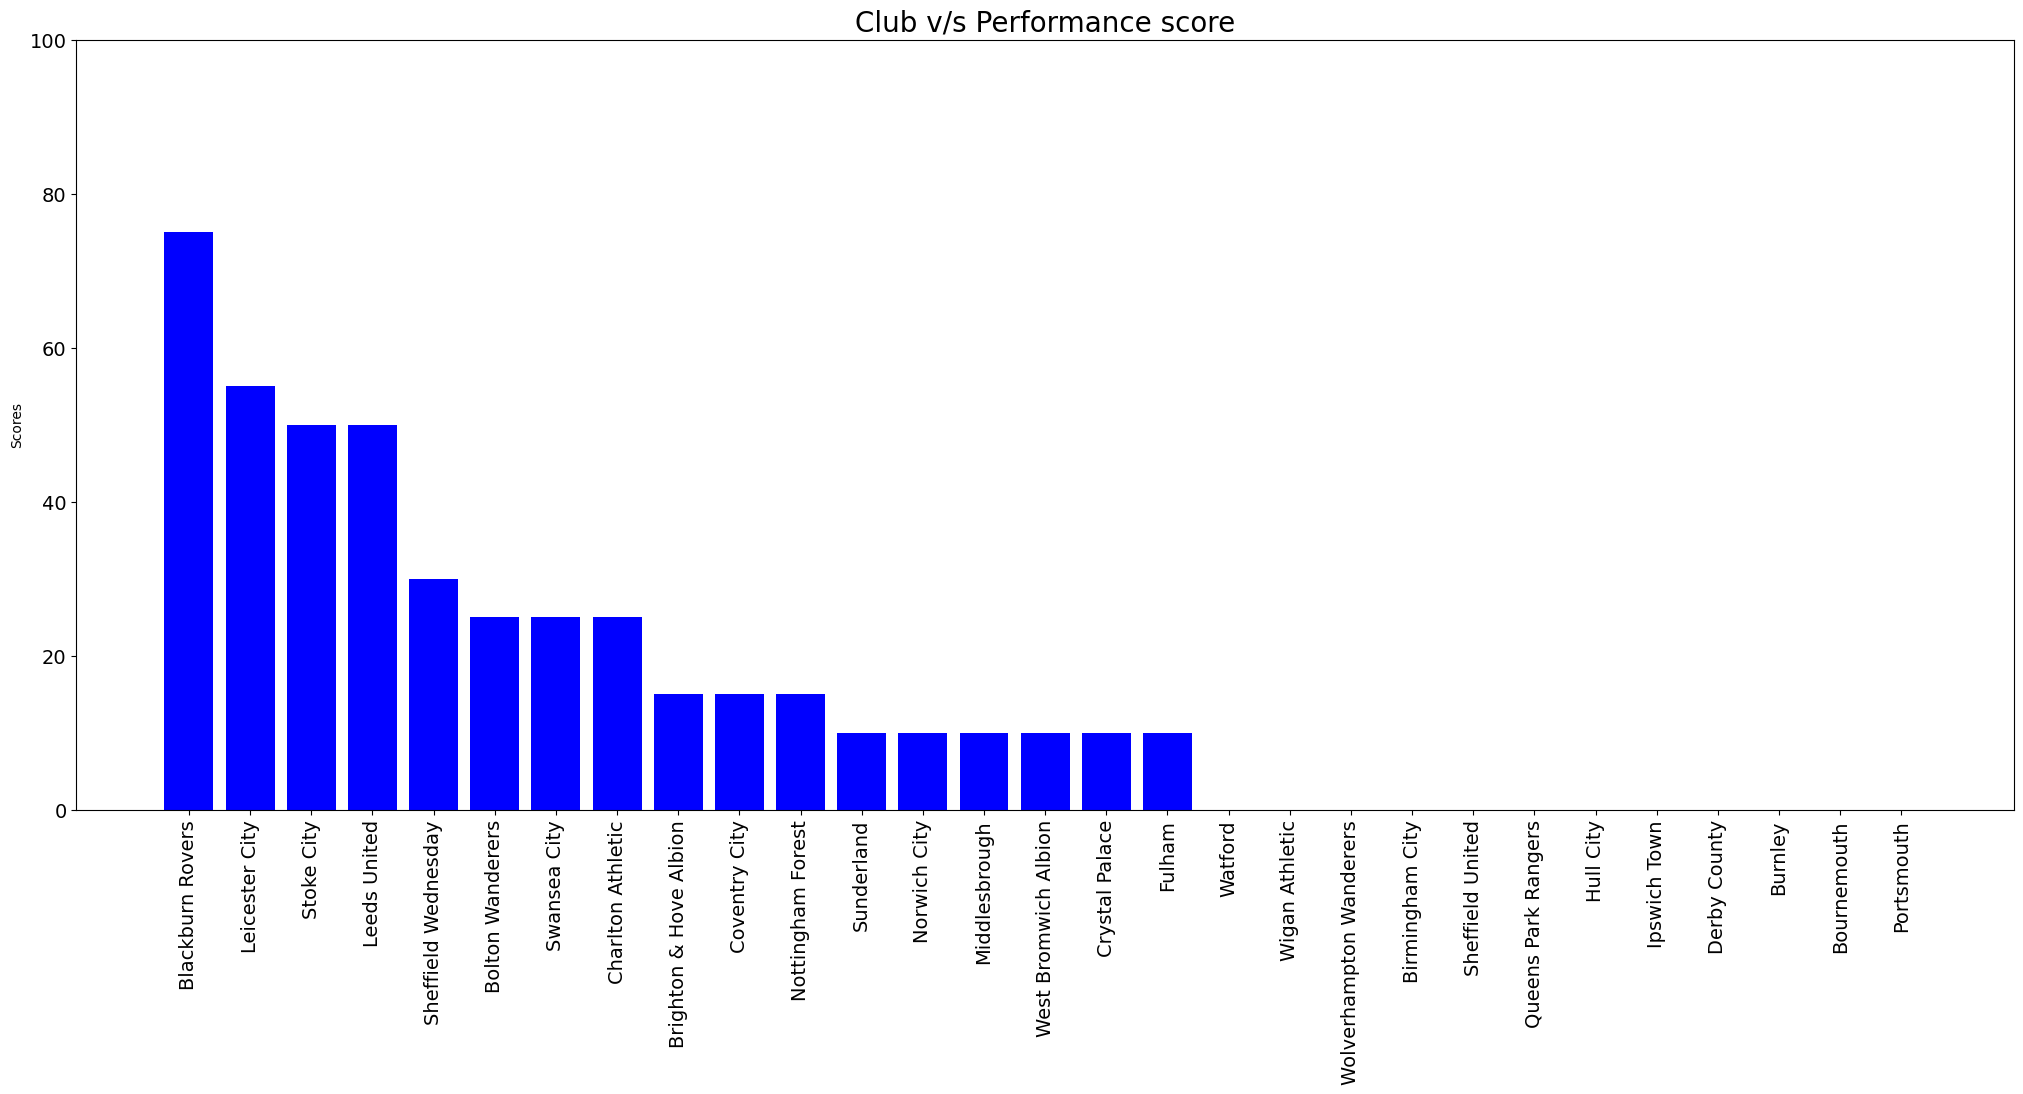

In [56]:
#sorting the data frame by Scores column in descending order

df_sort=df.sort_values(by="scores",ascending=False)

#plotting a bar chart
plt.figure(figsize=(25,10))
plt.bar(df_sort["Club"],df_sort["scores"],color="blue")

#adding labes and titles
plt.ylabel("Scores")
plt.title('Club v/s Performance score',fontsize=20)

#rotating the club names on x axis for readablity
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#Setting the values on y axis to start from 0 and end at 100\
plt.ylim(0,100)

##### Based on the chart above, we have ' Blackburn Rovers' to be on the top of the list followed by 'Leicester City' 

To ensure a thorough evaluvation of the clubs performance, we must consider in the club's current form.

Lets take a look the scores of the clubs that have played in the last three years.ie 2023,2022 or 2021

This approach allows us to pinpoint those clubs that are currently in good form and have consistently performed well over the past few years.

In [57]:
df_sort

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Win rate,Loss rate,Drawn Rate,Clean sheet rate,Avg Goals per match,scores
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,75.0
13,Leicester City,642,216,262,164,860,167,1884,1.0,0,2023,33.644860,40.809969,25.545171,26.012461,1.0,55.0
21,Stoke City,380,116,155,109,398,101,1863,0.0,0,2018,30.526316,40.789474,28.684211,26.578947,1.0,50.0
12,Leeds United,574,223,202,149,784,179,1919,0.0,0,2023,38.850174,35.191638,25.958188,31.184669,1.0,50.0
20,Sheffield Wednesday,316,101,126,89,409,78,1867,0.0,0,2000,31.962025,39.873418,28.164557,24.683544,1.0,30.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0,25.0
23,Swansea City,266,82,118,66,306,71,1912,0.0,0,2018,30.827068,44.360902,24.812030,26.691729,1.0,25.0
6,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,2007,30.592105,42.434211,26.973684,29.934211,1.0,25.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0,15.0
7,Coventry City,354,99,143,112,387,92,1883,0.0,0,2001,27.966102,40.395480,31.638418,25.988701,1.0,15.0


(0.0, 100.0)

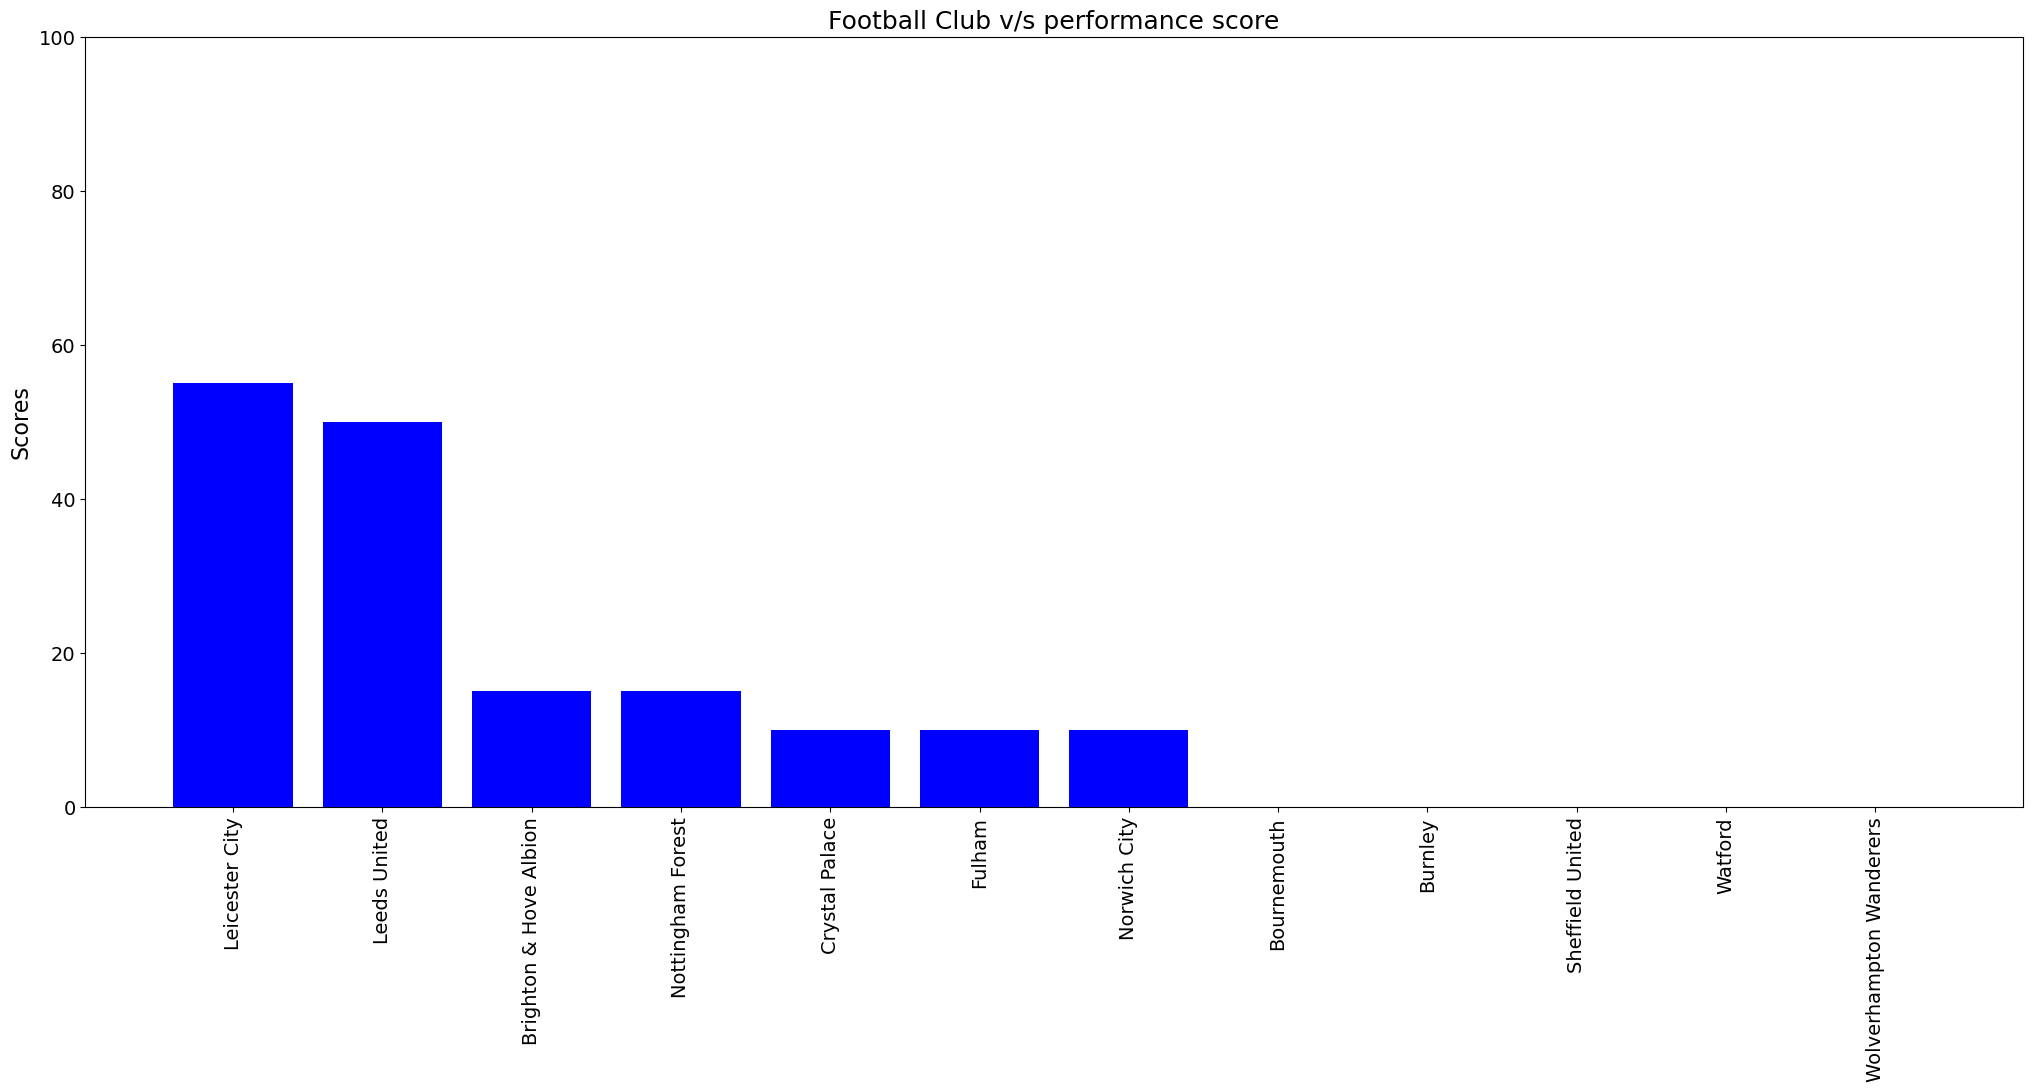

In [58]:
# sort the DataFrame by score in descending order
df_sort = df[(df['lastplayed_pl']=='2023') | (df['lastplayed_pl']=='2022') | (df['lastplayed_pl']=='2021')].sort_values(by='scores', ascending=False)

# create a bar chart of team scores
plt.figure(figsize=(25,10))
plt.bar(df_sort['Club'], df_sort['scores'], color='blue')

# add labels and title to the chart
plt.ylabel('Scores', fontsize=16)
plt.title('Football Club v/s performance score', fontsize=18)

# rotate the team names on the x-axis for readability
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# set the y-axis limit to start from 0 and end at 100
plt.ylim(0, 100)

On closer examination its evident that our Leader 'Blackburn Rovers' is not in the list. To get a better understanding of the performance, its necessary to investigate further and find out the last year in which 'Blackburn Rovers' played.

In [59]:
df[df['Club']=='Blackburn Rovers']['lastplayed_pl']

1    2012
Name: lastplayed_pl, dtype: object

The year in which the club 'Blackburn Rovers'last played is in 2012, which is a long time ago, the recommendation is that the firm invests in "Liecester City" instead. Based on the data Liecester City's performance and form makes them a better choice of investment.

To support the claim, we will conduct a further secondary analysis to provide additional evidence of Leicester City's current form and potential for success.

According to the research, 'Blackburn Rovers' were relegated to championship league(a league below premier league) and later to League one(League below championship League). However, they were promoted back to the Championship in 2018 and have since finished in the middle of the table in recent years. Given their inconsistent performance and lack of presence in the Premier League since 2012, it would be inappropriate to recommend this club for investment.

On the other hand, Leicester City, the 2016 Premier League champions, have consistently finished in the top 10 in recent years. They placed 5th in both the 2019-2020 and 2020-2021 seasons and finished 8th in 2021-2022. With sufficient financial backing, Leicester City has the potential to achieve even greater success in the near future. Therefore, it would be reasonable to recommend Leicester City to our clients.

Source 1: https://www.transfermarkt.co.in/blackburn-rovers/platzierungen/verein/164

Source 2: https://www.transfermarkt.co.in/leicester-city/platzierungen/verein/1003

# The recommendation is to invest in 'Leicester City' based on the analysis

### Thank you!